
📋 Calorie Burn Summary Table:
 Minute  Average_Heart_Rate  Duration  Calories_This_Minute  Cumulative_Calories
      1               70.00         1                  1.25                 1.25
      2               75.00         2                  7.35                 8.60
      3               80.00         3                 12.97                21.58
      4               83.75         4                 18.21                39.78
      5               87.00         5                 23.51                63.29
      6               90.83         6                 29.31                92.60
      7               94.29         7                 35.47               128.07
      8               97.50         8                 42.10               170.17
      9              100.56         9                 49.27               219.44
     10              103.50        10                 57.04               276.47
     11              106.36        11                 65.47               341.

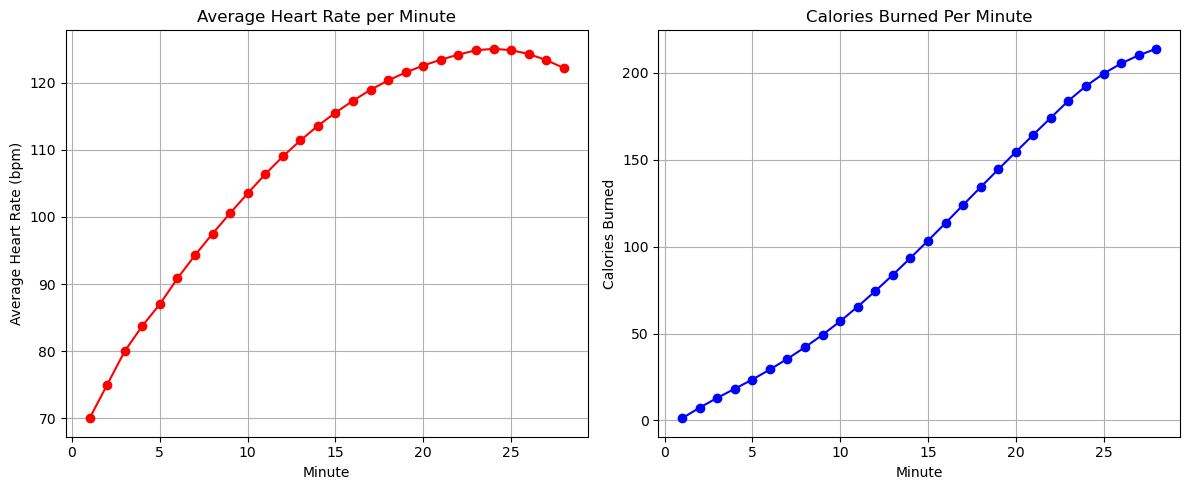

In [7]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# API URL
url = "http://localhost:8000/predict_calories"

# Fixed user input (except Duration and Heart Rate)
base_data = {
    "Gender": "female",
    "Age": 23,
    "Height": 1.82,
    "Weight": 90,
    "Body_Temp": 37.0
}

# Heart rate profile for 30 minutes
heart_rate_profile_30_min = [
    70, 80, 90, 95, 100, 110, 115, 120,
    125, 130, 135, 138, 140, 142, 143, 144, 145, 144,
    143, 142, 141, 140, 139, 130, 120, 110, 100, 90
]

minutes = len(heart_rate_profile_30_min)
average_heart_rates = []
calories_each_minute = []
cumulative_calories = []

# Loop through each minute
for i in range(minutes):
    # Compute average heart rate up to this minute (inclusive)
    avg_hr = sum(heart_rate_profile_30_min[:i+1]) / (i + 1)
    average_heart_rates.append(avg_hr)

    # Update input data
    data = base_data.copy()
    data["Heart_Rate"] = avg_hr
    data["Duration"] = i + 1  # cumulative duration

    # Call API
    response = requests.post(url, json=data)
    result = response.json()
    predicted_cal = result["predicted_calories"]

    calories_each_minute.append(predicted_cal)
    cumulative_calories.append(sum(calories_each_minute))

# Create DataFrame
df = pd.DataFrame({
    "Minute": list(range(1, minutes + 1)),
    "Average_Heart_Rate": average_heart_rates,
    "Duration": list(range(1, minutes + 1)),
    "Calories_This_Minute": calories_each_minute,
    "Cumulative_Calories": cumulative_calories
})

# Display DataTable
print("\n📋 Calorie Burn Summary Table:")
print(df.to_string(index=False, float_format="%.2f"))

# Plotting
plt.figure(figsize=(12, 5))

# 1. Average Heart Rate per minute
plt.subplot(1, 2, 1)
plt.plot(df["Minute"], df["Average_Heart_Rate"], marker='o', color='red')
plt.title("Average Heart Rate per Minute")
plt.xlabel("Minute")
plt.ylabel("Average Heart Rate (bpm)")
plt.grid(True)

# 2. Calories burned per minute (not cumulative)
plt.subplot(1, 2, 2)
plt.plot(df["Minute"], df["Calories_This_Minute"], marker='o', color='blue')
plt.title("Calories Burned Per Minute")
plt.xlabel("Minute")
plt.ylabel("Calories Burned")
plt.grid(True)

plt.tight_layout()
plt.show()
